In [1]:
import matplotlib.pyplot as m
from scipy.stats import bernoulli
from scipy.stats import binom
from scipy import stats
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

In [2]:
data = pd.read_csv("C:\\Users\\sidd7\\Downloads\\NIFTY 50.csv")
data.head()

,date,close,high,low,open,volume
0,2015-01-09 09:15:00+05:30,8301.20,8301.30,8285.45,8285.45,0
1,2015-01-09 09:20:00+05:30,8301.00,8303.00,8293.25,8300.50,0
2,2015-01-09 09:25:00+05:30,8294.15,8302.55,8286.80,8301.65,0
3,2015-01-09 09:30:00+05:30,8288.50,8295.75,8280.65,8294.10,0
4,2015-01-09 09:35:00+05:30,8283.45,8290.45,8278.00,8289.10,0


In [3]:
data['date'] = pd.to_datetime(data['date'])
data['date1'] = data['date'].dt.date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['time'] = data['date'].dt.time
data.head()

,date,close,high,low,open,volume,date1,year,month,day,time
0,2015-01-09 09:15:00+05:30,8301.20,8301.30,8285.45,8285.45,0,2015-01-09,2015,1,9,09:15:00
1,2015-01-09 09:20:00+05:30,8301.00,8303.00,8293.25,8300.50,0,2015-01-09,2015,1,9,09:20:00
2,2015-01-09 09:25:00+05:30,8294.15,8302.55,8286.80,8301.65,0,2015-01-09,2015,1,9,09:25:00
3,2015-01-09 09:30:00+05:30,8288.50,8295.75,8280.65,8294.10,0,2015-01-09,2015,1,9,09:30:00
4,2015-01-09 09:35:00+05:30,8283.45,8290.45,8278.00,8289.10,0,2015-01-09,2015,1,9,09:35:00


In [4]:
bear = data.copy()
bear = bear.drop(['volume', 'year','month','day','time'], axis = 1)

In [5]:
bear = bear.reset_index()
bear

,index,date,close,high,low,open,date1
0,0,2015-01-09 09:15:00+05:30,8301.20,8301.30,8285.45,8285.45,2015-01-09
1,1,2015-01-09 09:20:00+05:30,8301.00,8303.00,8293.25,8300.50,2015-01-09
2,2,2015-01-09 09:25:00+05:30,8294.15,8302.55,8286.80,8301.65,2015-01-09
3,3,2015-01-09 09:30:00+05:30,8288.50,8295.75,8280.65,8294.10,2015-01-09
4,4,2015-01-09 09:35:00+05:30,8283.45,8290.45,8278.00,8289.10,2015-01-09
...,...,...,...,...,...,...,...
136197,136197,2022-10-21 15:05:00+05:30,17577.60,17577.95,17562.35,17562.35,2022-10-21
136198,136198,2022-10-21 15:10:00+05:30,17571.00,17580.95,17570.10,17578.00,2022-10-21
136199,136199,2022-10-21 15:15:00+05:30,17579.45,17581.00,17570.75,17571.35,2022-10-21
136200,136200,2022-10-21 15:20:00+05:30,17595.20,17595.20,17576.75,17579.40,2022-10-21


In [6]:
bear['size_of_candle'] = bear['close'] - bear['open']
bear.head(17)

,index,date,close,high,low,open,date1,size_of_candle
0,0,2015-01-09 09:15:00+05:30,8301.20,8301.30,8285.45,8285.45,2015-01-09,15.75
1,1,2015-01-09 09:20:00+05:30,8301.00,8303.00,8293.25,8300.50,2015-01-09,0.50
2,2,2015-01-09 09:25:00+05:30,8294.15,8302.55,8286.80,8301.65,2015-01-09,-7.50
3,3,2015-01-09 09:30:00+05:30,8288.50,8295.75,8280.65,8294.10,2015-01-09,-5.60
4,4,2015-01-09 09:35:00+05:30,8283.45,8290.45,8278.00,8289.10,2015-01-09,-5.65
5,5,2015-01-09 09:40:00+05:30,8285.55,8288.30,8277.40,8283.40,2015-01-09,2.15
6,6,2015-01-09 09:45:00+05:30,8283.75,8287.65,8278.05,8285.40,2015-01-09,-1.65
7,7,2015-01-09 09:50:00+05:30,8276.25,8284.25,8273.95,8283.80,2015-01-09,-7.55
8,8,2015-01-09 09:55:00+05:30,8282.00,8283.60,8275.05,8275.95,2015-01-09,6.05
9,9,2015-01-09 10:00:00+05:30,8285.50,8287.35,8281.70,8281.80,2015-01-09,3.70


In [7]:
check = []
for i in bear['size_of_candle']:
    if i >0:
        check.append(True)
    if i < 0:
        check.append(False)
    if i == 0:
        check.append('null')
len(check)

136202

In [8]:
bear['is_bearish'] = check
bear

,index,date,close,high,low,open,date1,size_of_candle,is_bearish
0,0,2015-01-09 09:15:00+05:30,8301.20,8301.30,8285.45,8285.45,2015-01-09,15.75,True
1,1,2015-01-09 09:20:00+05:30,8301.00,8303.00,8293.25,8300.50,2015-01-09,0.50,True
2,2,2015-01-09 09:25:00+05:30,8294.15,8302.55,8286.80,8301.65,2015-01-09,-7.50,False
3,3,2015-01-09 09:30:00+05:30,8288.50,8295.75,8280.65,8294.10,2015-01-09,-5.60,False
4,4,2015-01-09 09:35:00+05:30,8283.45,8290.45,8278.00,8289.10,2015-01-09,-5.65,False
...,...,...,...,...,...,...,...,...,...
136197,136197,2022-10-21 15:05:00+05:30,17577.60,17577.95,17562.35,17562.35,2022-10-21,15.25,True
136198,136198,2022-10-21 15:10:00+05:30,17571.00,17580.95,17570.10,17578.00,2022-10-21,-7.00,False
136199,136199,2022-10-21 15:15:00+05:30,17579.45,17581.00,17570.75,17571.35,2022-10-21,8.10,True
136200,136200,2022-10-21 15:20:00+05:30,17595.20,17595.20,17576.75,17579.40,2022-10-21,15.80,True


In [9]:
bearish_engulfing = []
for i in range(136202):
    if(bear['is_bearish'][i] == True) and (bear['is_bearish'][i+1] == False) and (bear['date1'][i] == bear['date1'][i+1]) and (bear['close'][i+1] < bear['open'][i]) and (bear['open'][i+1] > bear['close'][i]):
        lst = [bear['index'][i],bear['index'][i+1],bear['index'][i+2],bear['index'][i+3],bear['index'][i+4]]
        bearish_engulfing.append(lst)

In [10]:
bearish_engulfing

[[1, 2, 3, 4, 5],
 [9, 10, 11, 12, 13],
 [23, 24, 25, 26, 27],
 [32, 33, 34, 35, 36],
 [52, 53, 54, 55, 56],
 [71, 72, 73, 74, 75],
 [73, 74, 75, 76, 77],
 [96, 97, 98, 99, 100],
 [108, 109, 110, 111, 112],
 [122, 123, 124, 125, 126],
 [124, 125, 126, 127, 128],
 [157, 158, 159, 160, 161],
 [174, 175, 176, 177, 178],
 [176, 177, 178, 179, 180],
 [187, 188, 189, 190, 191],
 [214, 215, 216, 217, 218],
 [236, 237, 238, 239, 240],
 [255, 256, 257, 258, 259],
 [261, 262, 263, 264, 265],
 [352, 353, 354, 355, 356],
 [413, 414, 415, 416, 417],
 [423, 424, 425, 426, 427],
 [463, 464, 465, 466, 467],
 [539, 540, 541, 542, 543],
 [546, 547, 548, 549, 550],
 [557, 558, 559, 560, 561],
 [564, 565, 566, 567, 568],
 [594, 595, 596, 597, 598],
 [619, 620, 621, 622, 623],
 [627, 628, 629, 630, 631],
 [643, 644, 645, 646, 647],
 [680, 681, 682, 683, 684],
 [682, 683, 684, 685, 686],
 [700, 701, 702, 703, 704],
 [713, 714, 715, 716, 717],
 [737, 738, 739, 740, 741],
 [777, 778, 779, 780, 781],
 [802, 80

In [12]:
for i in range(len(bearish_engulfing)-1):
    for j in bearish_engulfing[i]:
        if j in bearish_engulfing[i+1]:
            bearish_engulfing.pop(i+1)

In [13]:
bearish_engulfing1 = []
for i in bearish_engulfing:
    for j in i:
        bearish_engulfing1.append(j)

In [14]:
bearish_engulfing1

[1,
 2,
 3,
 4,
 5,
 9,
 10,
 11,
 12,
 13,
 23,
 24,
 25,
 26,
 27,
 32,
 33,
 34,
 35,
 36,
 52,
 53,
 54,
 55,
 56,
 71,
 72,
 73,
 74,
 75,
 96,
 97,
 98,
 99,
 100,
 108,
 109,
 110,
 111,
 112,
 122,
 123,
 124,
 125,
 126,
 157,
 158,
 159,
 160,
 161,
 174,
 175,
 176,
 177,
 178,
 187,
 188,
 189,
 190,
 191,
 214,
 215,
 216,
 217,
 218,
 236,
 237,
 238,
 239,
 240,
 255,
 256,
 257,
 258,
 259,
 261,
 262,
 263,
 264,
 265,
 352,
 353,
 354,
 355,
 356,
 413,
 414,
 415,
 416,
 417,
 423,
 424,
 425,
 426,
 427,
 463,
 464,
 465,
 466,
 467,
 539,
 540,
 541,
 542,
 543,
 546,
 547,
 548,
 549,
 550,
 557,
 558,
 559,
 560,
 561,
 564,
 565,
 566,
 567,
 568,
 594,
 595,
 596,
 597,
 598,
 619,
 620,
 621,
 622,
 623,
 627,
 628,
 629,
 630,
 631,
 643,
 644,
 645,
 646,
 647,
 680,
 681,
 682,
 683,
 684,
 700,
 701,
 702,
 703,
 704,
 713,
 714,
 715,
 716,
 717,
 737,
 738,
 739,
 740,
 741,
 777,
 778,
 779,
 780,
 781,
 802,
 803,
 804,
 805,
 806,
 826,
 827,
 828,
 8

In [15]:
bear_df = bear[bear['index'].isin(bearish_engulfing1)]
bear_df.to_csv("bear_df.csv")
bear_df

,index,date,close,high,low,open,date1,size_of_candle,is_bearish
1,1,2015-01-09 09:20:00+05:30,8301.00,8303.00,8293.25,8300.50,2015-01-09,0.50,True
2,2,2015-01-09 09:25:00+05:30,8294.15,8302.55,8286.80,8301.65,2015-01-09,-7.50,False
3,3,2015-01-09 09:30:00+05:30,8288.50,8295.75,8280.65,8294.10,2015-01-09,-5.60,False
4,4,2015-01-09 09:35:00+05:30,8283.45,8290.45,8278.00,8289.10,2015-01-09,-5.65,False
5,5,2015-01-09 09:40:00+05:30,8285.55,8288.30,8277.40,8283.40,2015-01-09,2.15,True
...,...,...,...,...,...,...,...,...,...
136191,136191,2022-10-21 14:35:00+05:30,17546.45,17549.10,17535.00,17542.60,2022-10-21,3.85,True
136192,136192,2022-10-21 14:40:00+05:30,17538.30,17555.75,17535.45,17546.75,2022-10-21,-8.45,False
136193,136193,2022-10-21 14:45:00+05:30,17531.95,17546.85,17531.95,17538.10,2022-10-21,-6.15,False
136194,136194,2022-10-21 14:50:00+05:30,17535.40,17541.60,17529.65,17532.25,2022-10-21,3.15,True


In [16]:
def split_dataframe_by_position(df, splits):
    """
    Takes a dataframe and an integer of the number of splits to create.
    Returns a list of dataframes.
    
    """
    dataframes = []
    index_to_split = len(df) // splits
    start = 0
    end = index_to_split
    for split in range(splits):
        temporary_df = df.iloc[start:end, :]
        dataframes.append(temporary_df)
        start += index_to_split
        end += index_to_split
    return dataframes
bearish_engulfing_df = split_dataframe_by_position(bear_df, 6288)

In [17]:
bearish_engulfing_df[100]

,index,date,close,high,low,open,date1,size_of_candle,is_bearish
2263,2263,2015-02-25 10:30:00+05:30,8824.50,8828.15,8823.90,8824.10,2015-02-25,0.40,True
2264,2264,2015-02-25 10:35:00+05:30,8819.15,8825.20,8818.05,8825.20,2015-02-25,-6.05,False
2265,2265,2015-02-25 10:40:00+05:30,8817.30,8822.00,8817.20,8819.10,2015-02-25,-1.80,False
2266,2266,2015-02-25 10:45:00+05:30,8816.50,8821.90,8815.65,8817.45,2015-02-25,-0.95,False
2267,2267,2015-02-25 10:50:00+05:30,8818.45,8821.50,8815.85,8816.90,2015-02-25,1.55,True


In [18]:
len(bearish_engulfing_df)

6288

In [19]:
change_percent = []
for i in range(len(bearish_engulfing_df)):
    entry = bearish_engulfing_df[i]['open'][2:3]
    exit = bearish_engulfing_df[i]['close'][2:].min()
    change = ((exit -entry)/entry)*100
    change_percent.append(change)

In [20]:
change_percent1 = []
for i in change_percent:
    change_percent1.append(float(i))
change_percent1

[-0.12840452852026907,
 0.018115832633860907,
 -0.27782643095711207,
 0.008524993454031744,
 -0.33962241265336074,
 -0.15940488841656494,
 -0.02655882175409824,
 -0.321180398336145,
 -0.0006047484850962446,
 -0.05575539568344887,
 -0.02701339864572828,
 -0.1217661490105707,
 -0.0006041273983769804,
 -0.0735161193130505,
 -0.17135168727109054,
 -0.36376600540208887,
 -0.06838130832307918,
 0.046252115009698044,
 0.01928753031940894,
 0.04945166826657359,
 -0.16173898081500804,
 0.07933086142967591,
 -0.02006903748896203,
 -0.056821769051084804,
 0.011458625767011763,
 0.03771945866862989,
 0.023983554134312055,
 0.023443441268453387,
 -0.11915181974757062,
 0.05395152313668476,
 -0.013616480480216133,
 0.03967264401169776,
 -0.10073285985116025,
 0.016954804143754134,
 -0.15779424977537368,
 0.008377922498631606,
 0.07231630816838744,
 -0.19022074584489126,
 -0.47736847124290915,
 0.023693474140248947,
 -0.0016897981254465149,
 0.006757974409807666,
 -0.017315050129854747,
 -0.273804202

In [21]:
profits = []
for i in change_percent1:
    if i < 0:
        
        profits.append(i)
len(profits)/len(change_percent1)

0.6714376590330788

Back Testing

In [22]:
be_split = bearish_engulfing_df
len(be_split)

6288

In [23]:
for i in range(6288):
    be_split[i]['candle_change'] = ((be_split[i]['close'] - be_split[i]['open'])/be_split[i]['open'])*100

C:\Users\sidd7\AppData\Local\Temp/ipykernel_17920/4259310579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  be_split[i]['candle_change'] = ((be_split[i]['close'] - be_split[i]['open'])/be_split[i]['open'])*100


In [24]:
be_split[0]

,index,date,close,high,low,open,date1,size_of_candle,is_bearish,candle_change
1,1,2015-01-09 09:20:00+05:30,8301.00,8303.00,8293.25,8300.50,2015-01-09,0.50,True,0.006024
2,2,2015-01-09 09:25:00+05:30,8294.15,8302.55,8286.80,8301.65,2015-01-09,-7.50,False,-0.090343
3,3,2015-01-09 09:30:00+05:30,8288.50,8295.75,8280.65,8294.10,2015-01-09,-5.60,False,-0.067518
4,4,2015-01-09 09:35:00+05:30,8283.45,8290.45,8278.00,8289.10,2015-01-09,-5.65,False,-0.068162
5,5,2015-01-09 09:40:00+05:30,8285.55,8288.30,8277.40,8283.40,2015-01-09,2.15,True,0.025956


In [25]:
for i in range(6288):
    exit = float(be_split[i]['close'][1:2])
    be_split[i]['stop_change'] = ((be_split[i]['close'] - exit)/exit)*100

C:\Users\sidd7\AppData\Local\Temp/ipykernel_17920/3031195654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  be_split[i]['stop_change'] = ((be_split[i]['close'] - exit)/exit)*100


In [26]:
be_split[1]

,index,date,close,high,low,open,date1,size_of_candle,is_bearish,candle_change,stop_change
9,9,2015-01-09 10:00:00+05:30,8285.50,8287.35,8281.70,8281.80,2015-01-09,3.70,True,0.044676,0.062800
10,10,2015-01-09 10:05:00+05:30,8280.30,8286.40,8279.95,8285.55,2015-01-09,-5.25,False,-0.063363,0.000000
11,11,2015-01-09 10:10:00+05:30,8281.55,8281.60,8274.95,8280.05,2015-01-09,1.50,True,0.018116,0.015096
12,12,2015-01-09 10:15:00+05:30,8283.35,8284.25,8277.95,8281.50,2015-01-09,1.85,True,0.022339,0.036834
13,13,2015-01-09 10:20:00+05:30,8287.50,8287.90,8283.10,8283.65,2015-01-09,3.85,True,0.046477,0.086953


In [27]:
final =[]
for i in range(6288):
    final.append((list(be_split[i]['stop_change'])))
final

[[0.08258833032921233,
  0.0,
  -0.0681203016583934,
  -0.12900658898137735,
  -0.10368753880747714],
 [0.06279965701726663,
  0.0,
  0.015096071398379289,
  0.03683441421205864,
  0.08695337125467349],
 [0.0471102682265356,
  0.0,
  -0.14374671587074214,
  -0.1654899165906749,
  -0.276621831381496],
 [0.5796748462522117,
  0.0,
  0.004262315045976542,
  0.126042744930894,
  0.12178042988491748],
 [0.06064943414077947,
  0.0,
  -0.110988464477622,
  -0.16193398915588558,
  -0.33539137079850606],
 [0.05615229952725144,
  0.0,
  0.06400154569772061,
  -0.009660610671343278,
  -0.1624190169120934],
 [0.027161119762430738,
  0.0,
  -0.030782602397412723,
  -0.031386182836591024,
  -0.0024143217566473356],
 [0.11290020708434145,
  0.0,
  -0.1575772943797344,
  -0.22519666974575883,
  -0.3175695664511211],
 [0.05926535154028999,
  0.0,
  0.05866060305519375,
  -0.0006047484850962446,
  0.08708378185513525],
 [0.05096106574577023,
  0.0,
  -0.05216014964567506,
  -0.0017986258498681627,
  -0.

In [28]:
final1 = []
for i in final:
    final1.append(i[2:])
final1
len(final1)

6288

In [59]:
f1 = []
for i in final1:
    if i[0] >= 0 and i[1] >= 0 and (i[2] < 0 or i[2]>=0):
        e1 = (i[1])*0.1
        f1.append(e1)
    if i[0] >= 0 and i[1] < 0 and (i[2] >= 0 or i[2] < 0):
        e2 = i[0] +(i[1])
        f1.append(e2)
    if i[0] < 0 and i[1] >= 0 and (i[2] >= 0 or i[2] < 0):
        e3 = i[0] + (i[1])*0.3
        f1.append(e3)
    if i[0] < 0 and i[1] < 0 and i[2] >= 0:
        e4 = i[1] 
        f1.append(e4)
    if i[0] < 0 and i[1] < 0 and i[2] < 0:
        e5 = i[2]
        f1.append(e5)


In [58]:
len(f1)

6121

In [56]:
c = 0
for i in f1:
    if i < 0:
        c +=1


,0
0,-0.103688
1,0.023791
2,-0.276622
3,0.052974
4,-0.335391
...,...
6116,-0.091105
6117,-0.028687
6118,-0.016151
6119,-0.073521


In [48]:
f1 = pd.DataFrame(f1)
f1.to_csv("bear_bt_final3.csv")

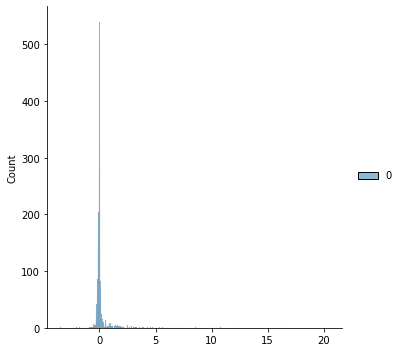

In [32]:
sns.displot(f1)

In [33]:
f2 = []
for i in final1:
    if min(i) >= 0:
        e11 = max(i)*0.80
        f2.append(e11)
    else:
        if i[0] < 0 and i[1] < 0 :
            e22 = min(i)*0.75
            f2.append(e22)
        if i[0] < 0 and i[1]>=0:
            e33 = i[0] + i[1]*0.30 
            f2.append(e33)
        if i[0] >= 0 and i[1] < 0:
            e44 = i[0]
            f2.append(e44)


In [53]:
c = 0
for i in f1:
    if i < 0:
        c += 1

,0
0,-0.103688
1,0.023791
2,-0.276622
3,0.052974
4,-0.335391
...,...
6116,-0.091105
6117,-0.028687
6118,-0.016151
6119,-0.073521


In [50]:
c/len(f1)

0.0